# Análisis geográfico 

## ¿Dónde se producen la mayor cantidad de clicks por longitud y latitud?

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")

In [3]:
from scipy.stats import gaussian_kde

In [4]:
clicks = pd.read_csv("clicks.csv", dtype={"source_id":"int8", "advertiser_id":"int8"})

In [5]:
events_dtypes = {'event_id': 'category', 'ref_type': 'category', 'application_id': 'category',
                  'device_countrycode': 'category', 'device_os_version': 'category',
                   'device_brand' : 'category', 'device_model' : 'category', 'session_user_agent': 'category', 'user_agent': 'category', 'carrier': 'category',
                   'kind': 'category', 'device_os' : 'category', 'wifi': 'category', 'connection_type': 'category',
                   'device_language': 'category'}

events = pd.read_csv('events.csv', dtype = events_dtypes, low_memory=False)

events["date"] =  pd.to_datetime(events["date"], errors = "coerce")

In [6]:
latitude = clicks["latitude"].values
longitude = clicks["longitude"].values

In [8]:
lat_long = np.vstack([latitude,longitude])
z = gaussian_kde(lat_long)(lat_long)

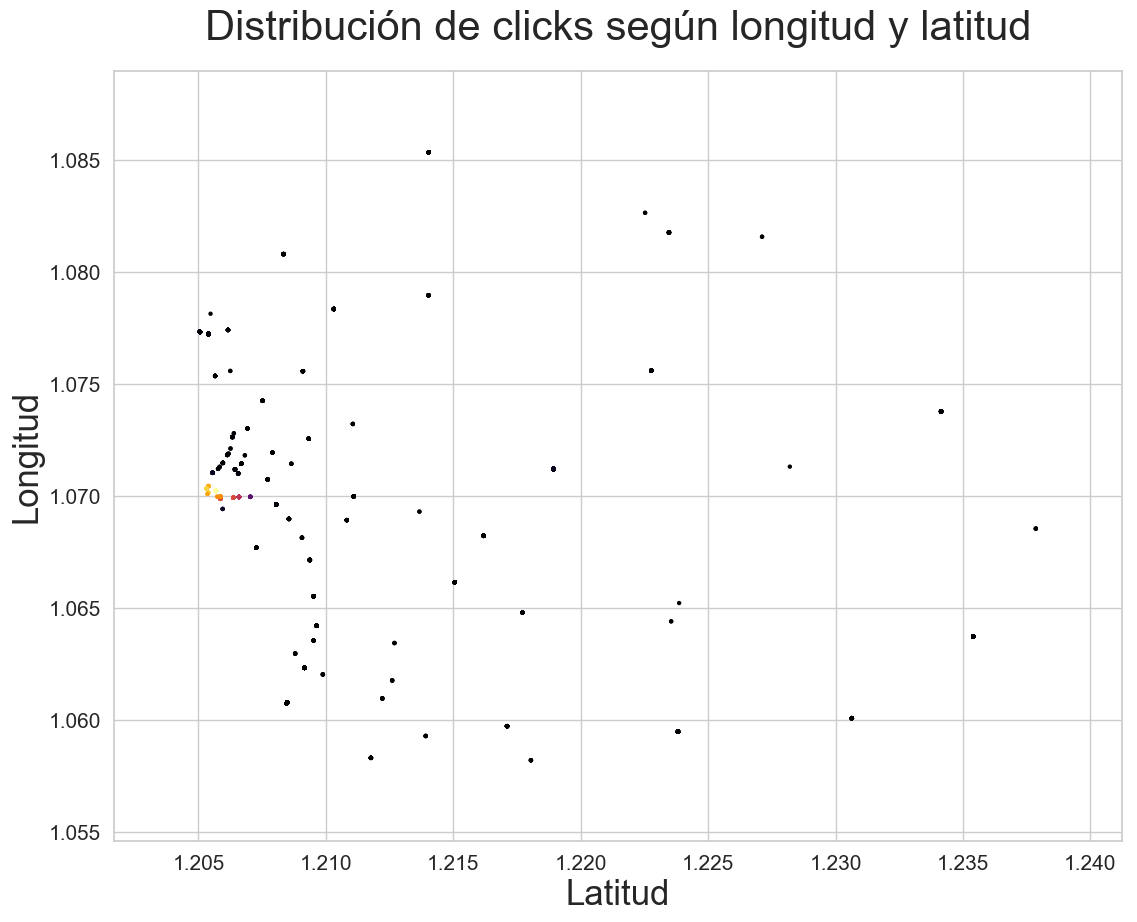

In [26]:
n = 10
fig, ax = plt.subplots()
plt.title("Distribución de clicks según longitud y latitud", fontsize = 30)
ax.scatter(latitude, longitude, c=z, cmap="inferno", s=10, edgecolor="");
ax.tick_params(labelsize=15, which='major')
ax.set_xlabel("Latitud", fontsize = 25)
ax.set_ylabel("Longitud", fontsize = 25)
ax.title.set_position([.5, 1.03])
plt.savefig("latitudLongitud.png")

## ¿Cuáles son las 20 ciudades donde se produjeron mayor cantidad de eventos?

In [56]:
top_cities = events.groupby(['device_city']).agg({'cant': 'count'}).reset_index()\
.sort_values(by = 'cant', ascending = False).head(20)

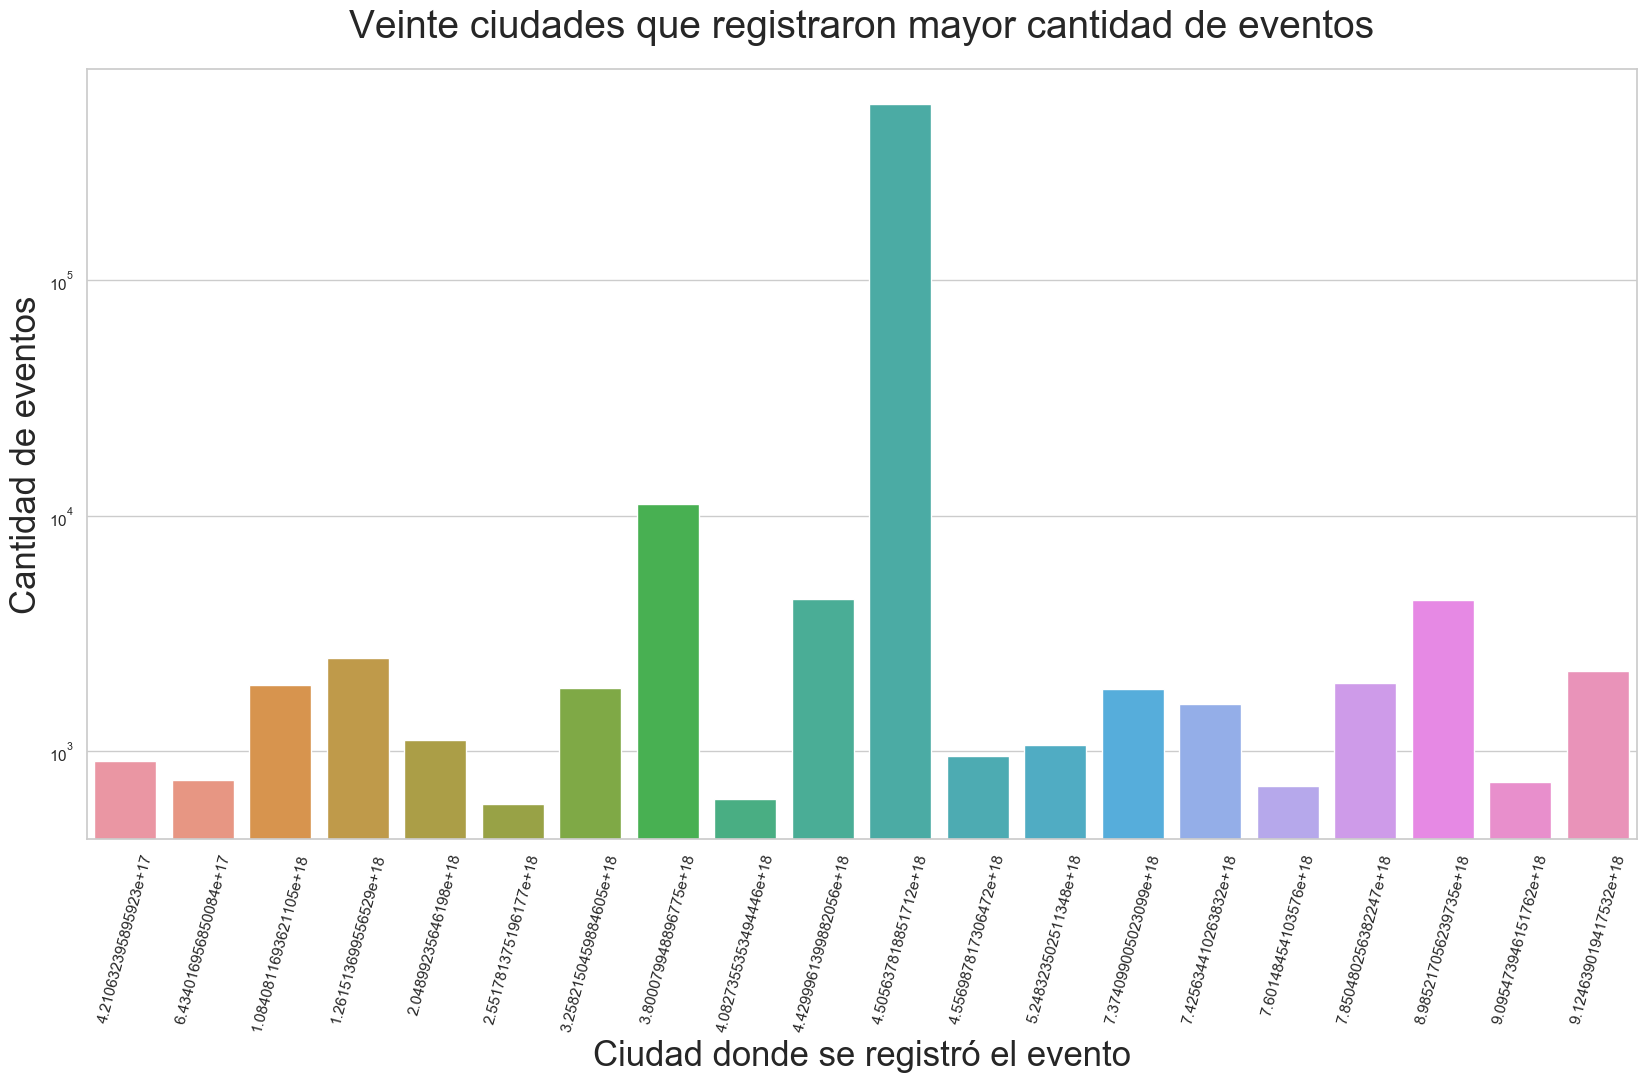

In [59]:
plt.rcParams["axes.labelsize"] = 30   
plot_a = sns.barplot(x=top_cities['device_city'], y=top_cities['cant'], orient='v')
plot_a.set_xticklabels(plot.get_xticklabels(),rotation=75)
plot_a.set_title("Veinte ciudades que registraron mayor cantidad de eventos", fontsize=28)
plot_a.set_xlabel("Ciudad donde se registró el evento", fontsize=25)
plot_a.title.set_position([.5, 1.03])
plot_a.set_ylabel("Cantidad de eventos", fontsize=25)
plot_a.set_yscale("log")
plt.savefig("top_cities.jpeg")

## ¿Cuáles son las 20 ciudades con mejor promedio de eventos por usuario?

In [13]:
events['cant'] = 1
top_cities_prom = events.groupby(['device_city', 'ref_hash']).agg({'cant': 'count'}).reset_index().groupby('device_city').agg({'cant': 'mean'})\
    .sort_values(by = 'cant', ascending = False).head(20).reset_index()

In [14]:
top_cities_prom = top_cities.rename({'cant':'promedio'}, axis = 1)

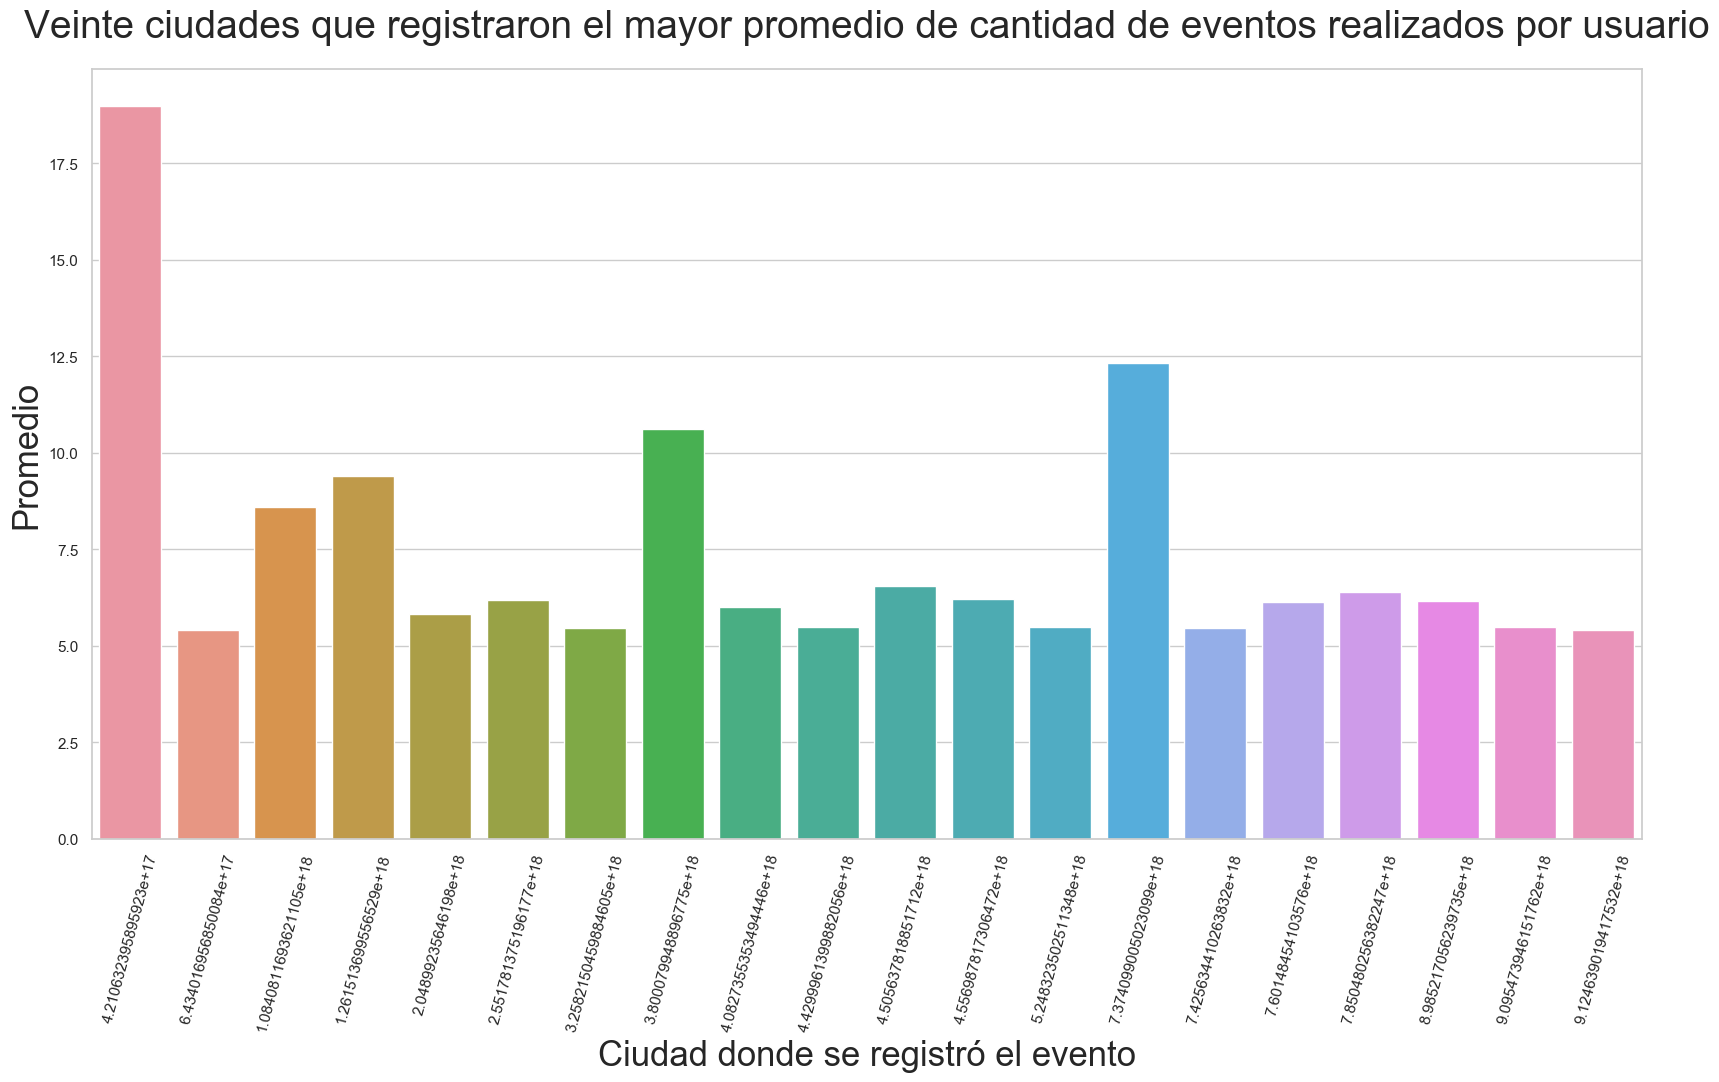

In [29]:
plt.rcParams["axes.labelsize"] = 30   
plot = sns.barplot(x=top_cities_prom['device_city'], y=top_cities_prom['promedio'], orient='v')
plot.set_xticklabels(plot.get_xticklabels(),rotation=75)
plot.set_title("Veinte ciudades que registraron el mayor promedio de eventos realizados por usuario", fontsize=28)
plot.set_xlabel("Ciudad donde se registró el evento", fontsize=25)
plot.title.set_position([.5, 1.03])
plot.set_ylabel("Promedio", fontsize=25)
plt.savefig("top_cities_events.jpeg")

In [49]:
city_cant_eventos = events.groupby(['device_city',"ref_hash"]).agg({'cant': "count"}).reset_index().groupby("device_city")\
.agg({'cant': lambda x: list(x)})

In [50]:
for x,row in city_cant_eventos.iterrows():
    print(x)
    print(row)
    break

4.355427726282191e+16
cant    [1, 2, 2]
Name: 4.355427726282191e+16, dtype: object
